In [2]:
import os
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd


### 1. Data exploration:

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [4]:
# Show details of the dataset
# Show the size of the dataset
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


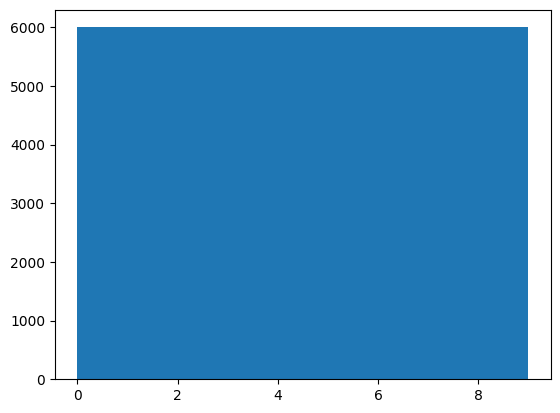

In [5]:
# Show the distribution of the classes
plt.hist(y_train, bins=10)
plt.show()

0 : T-shirt/top


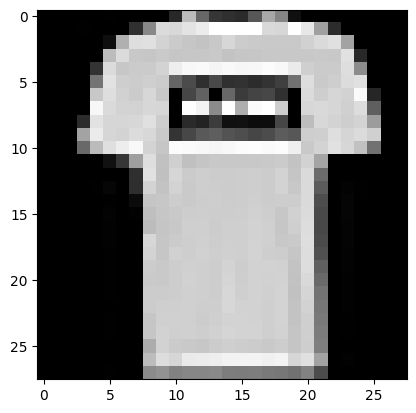

1 : Trouser


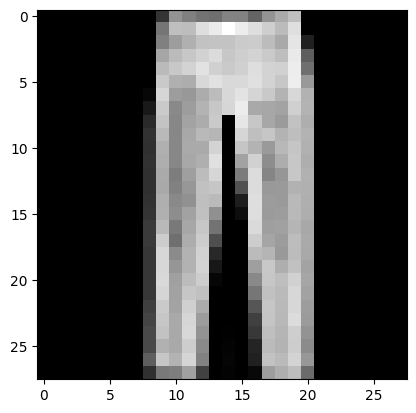

2 : Pullover


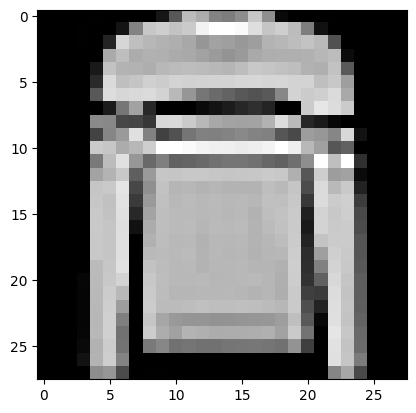

3 : Dress


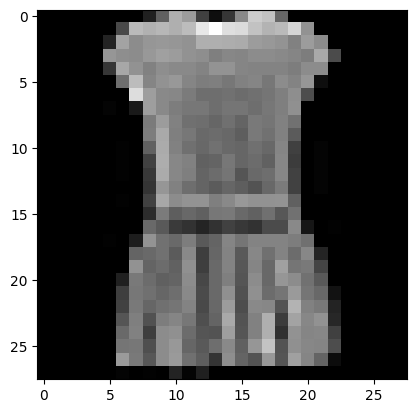

4 : Coat


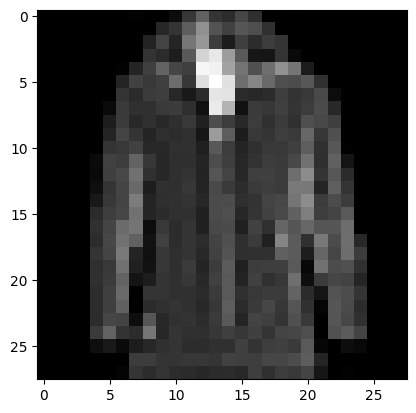

5 : Sandal


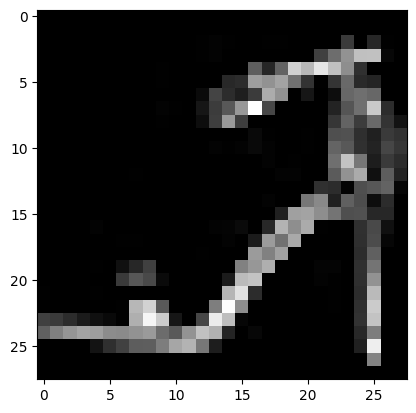

6 : Shirt


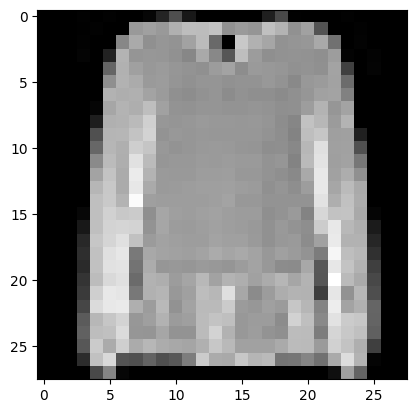

7 : Sneaker


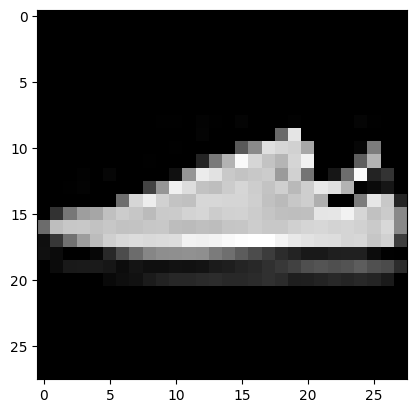

8 : Bag


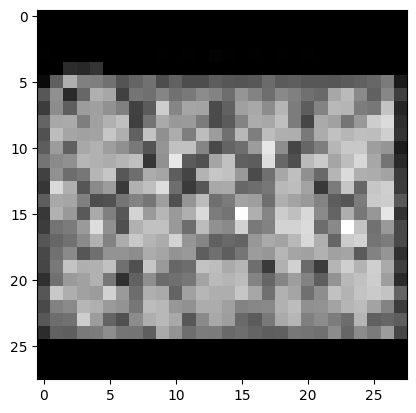

9 : Ankle boot


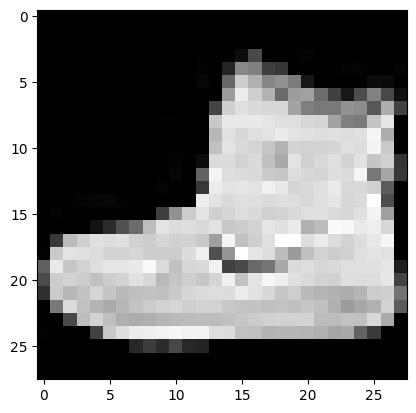

In [6]:
# Plot an image of every class
classes = "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
for i in range(10):
    plt.imshow(x_train[y_train == i][0], cmap='gray')
    print(y_train[y_train == i][0], ":", classes[i])
    plt.show()

In [7]:
# Select a classification metric, such as accuracy or another metric you find more suitable for the problem
# Accuracy is a good metric for this problem because it is a balanced dataset

### 2. Pre-processing:

In [ ]:
# Set a random seed for NumPy and Keras
np.random.seed(0)
tf.random.set_seed(0)

In [9]:
# Use the default splits for testing and training, and extract a validation dataset from the training set
# Data is already split into training and testing
# Splitting the training data into training and validation 4:1 ratio
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
print(x_train)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [10]:
# Normalize the data to ensure compatibility with the Keras neural networks interface.
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

### 3. Define your initial model:

In [11]:
# Build a Keras classifier model and print its initial architecture by calling the model’s summary method
model = models.Sequential()
# We add a convolutional layer that has 28 3x3 filters with
# relu activation function.
model.add(layers.Input(shape=(28, 28, 1)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# We add a pooling layer that uses the maximum function
# where the filter size is 2x2.
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10))

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 149,642 (584.54 KB)

 Trainable params: 149,642 (584.54 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Choose a loss function for training the model and reasonable starting hyperparameter values
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
keras.backend.clear_session()

### 4. Train your model:

In [14]:
# Train your model for ten epochs using the training split of the FashionMnist dataset
history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_val, y_val))
keras.backend.clear_session()

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.7372 - loss: 0.7164 - val_accuracy: 0.8673 - val_loss: 0.3664
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8716 - loss: 0.3520 - val_accuracy: 0.8799 - val_loss: 0.3282
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8912 - loss: 0.2940 - val_accuracy: 0.8869 - val_loss: 0.3183
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9035 - loss: 0.2598 - val_accuracy: 0.8892 - val_loss: 0.3164
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9151 - loss: 0.2292 - val_accuracy: 0.8882 - val_loss: 0.3377
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9239 - loss: 0.2035 - val_accuracy: 0.8871 - val_loss: 0.3503
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9350 - loss: 0.1784 - val_accuracy: 0.8943 - val_loss: 0.3304
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9403 - loss:

313/313 - 1s - 3ms/step - accuracy: 0.8987 - loss: 0.3989
0.8986999988555908


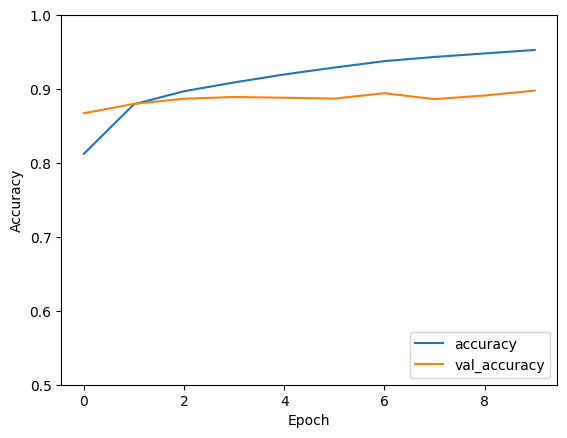

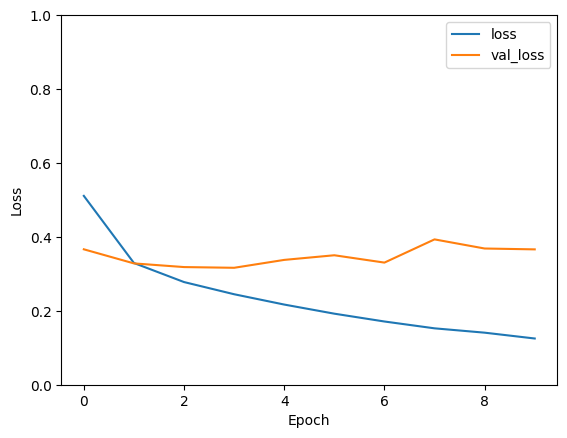

In [15]:
# Ensure that the model runs without errors and that the loss decreases more or less smoothly
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print(test_acc)
plt.show()

# Plot the loss of the model on the test and validation sets
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='upper right')
plt.show()

In [16]:
# TODO: Save the final model
model.save("model/final_classifier.h5")
print("Model saved as 'model/final_classifier.h5'")

Model saved as 'model/final_classifier.h5'


5. Hyperparameter tuning:

In [17]:
# Create a new improved model by tuning and hyperparameters, use the same model as earlier
# Build a Keras classifier model and print its initial architecture by calling the model’s summary method
def create_model():
    model_creation = models.Sequential()
    # We add a convolutional layer that has 28 3x3 filters with
    # relu activation function.
    model_creation.add(layers.Input(shape=(28, 28, 1)))
    model_creation.add(layers.Conv2D(64, (3, 3), activation='relu'))
    # We add a pooling layer that uses the maximum function
    # where the filter size is 2x2.
    model_creation.add(layers.MaxPooling2D((2, 2)))
    model_creation.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model_creation.add(layers.MaxPooling2D((2, 2)))
    model_creation.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model_creation.add(layers.Flatten())
    model_creation.add(layers.Dense(128, activation='relu'))
    model_creation.add(layers.Dense(10))
    return model_creation

In [18]:
# Implement the Keras EarlyStopping callback.
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    min_delta=0.001,
    restore_best_weights=True,
)

In [ ]:
# Select two hyperparameters and conduct a rough parameter search to fine-tune 
learning_rate = 0.00001  # This is a hyperparameter
batch_size = 32  # Another hyperparameter

: 

In [ ]:
results = pd.DataFrame(columns=['filters', 'kernel_size', 'pool_size', 'dense_units', 'accuracy', 'loss', 'batch_size', 'learning_rate'])
for batch_size in [16,32,64,128,256]:
    for learning_rate in [0.1, 0.01, 0.001, 0.0001]:
        print()
        print("Batch size: ", batch_size)
        print("Learning rate: ", learning_rate)
        model = create_model()
        optimizer = Adam(learning_rate=learning_rate)
        model.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
        history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_val, y_val),batch_size = batch_size, callbacks=[early_stopping])
        test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
        new_data = pd.DataFrame({'filters': 64, 'kernel_size': 3, 'pool_size': 2, 'dense_units': 128, 'accuracy': test_acc,'loss': test_loss, 'batch_size':batch_size, 'learning_rate':learning_rate, 'history':history, 'model': model}, index=[0]) 
        results = pd.concat([results, new_data], ignore_index=True)
        keras.backend.clear_session()


Batch size:  16
Learning rate:  0.1
Epoch 1/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.0983 - loss: 13.1933 - val_accuracy: 0.1002 - val_loss: 2.3269
Epoch 2/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.0997 - loss: 2.3213 - val_accuracy: 0.1002 - val_loss: 2.3270
Epoch 3/10
2999/3000 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0999 - loss: 2.3213

In [ ]:
# print(results.iloc[0])
print(results)

In [ ]:
# Ensure that the model runs without errors and that the loss decreases more or less smoothly
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print(test_acc)
plt.show()

# Plot the loss of the model on the test and validation sets
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Create a Pandas DataFrame file to report each run setup and performance metric and display its content
results = pd.DataFrame(columns=['filters', 'kernel_size', 'pool_size', 'dense_units', 'accuracy'])

In [ ]:
# Save the DataFram as a CSV file and include it in your package
results.to_csv('results.csv')

In [ ]:
# TODO: Save the final model weights
model.save("model/final_classifier.h5")
print("Model weights saved as 'model/final_classifier.h5'")

NameError: name 'model' is not defined